In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn

In [3]:
df= pd.read_excel('Sylhet Water Level and Rainfall.xlsx', sheet_name=0)
df.head()

,Date,Raw,Corrected mPWD
0,1980-01-01 12:00:00,3.18,2.57
1,1980-01-02 12:00:00,3.17,2.56
2,1980-01-03 12:00:00,3.15,2.54
3,1980-01-04 12:00:00,3.13,2.52
4,1980-01-05 12:00:00,3.12,2.51


In [4]:
df.dtypes


Date              datetime64[ns]
Raw                      float64
Corrected mPWD           float64
dtype: object

In [5]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [6]:
df = df.drop('Raw', axis = 1)
df.head()

,Date,Corrected mPWD
0,1980-01-01 12:00:00,2.57
1,1980-01-02 12:00:00,2.56
2,1980-01-03 12:00:00,2.54
3,1980-01-04 12:00:00,2.52
4,1980-01-05 12:00:00,2.51


In [7]:
df['Year'] = df['Date'].dt.strftime('%Y')
df.head()

,Date,Corrected mPWD,Year
0,1980-01-01 12:00:00,2.57,1980
1,1980-01-02 12:00:00,2.56,1980
2,1980-01-03 12:00:00,2.54,1980
3,1980-01-04 12:00:00,2.52,1980
4,1980-01-05 12:00:00,2.51,1980


In [8]:
df.tail()

,Date,Corrected mPWD,Year
55585,2022-06-30 06:00:00,11.22,2022
55586,2022-06-30 09:00:00,11.22,2022
55587,2022-06-30 12:00:00,11.23,2022
55588,2022-06-30 15:00:00,11.23,2022
55589,2022-06-30 18:00:00,11.24,2022


In [9]:
res = df.loc[df.reset_index().groupby(['Year'])['Corrected mPWD'].idxmax()]


print("Result:\n",res)
res.to_excel("annual_peak_WL_SURMA_1980-2022.xlsx")

Result:
                      Date  Corrected mPWD  Year
200   1980-07-19 12:00:00            9.78  1980
577   1981-07-31 12:00:00           10.53  1981
920   1982-07-09 12:00:00           10.61  1982
1333  1983-08-26 12:00:00           10.71  1983
1604  1984-05-23 12:00:00           10.94  1984
1984  1985-06-07 12:00:00           10.45  1985
2475  1986-10-11 12:00:00           10.27  1986
2769  1987-08-01 12:00:00           10.96  1987
3110  1988-07-07 12:00:00           11.33  1988
3499  1989-07-31 12:00:00           10.72  1989
3812  1990-06-09 12:00:00           10.58  1990
4150  1991-05-13 12:00:00           10.85  1991
4570  1992-07-06 12:00:00           10.69  1992
4919  1993-06-20 12:00:00           10.94  1993
5525  1994-06-04 09:00:00           10.55  1994
7414  1995-06-17 06:00:00           11.03  1995
9369  1996-07-12 06:00:00           10.78  1996
10795 1997-07-13 09:00:00           10.87  1997
12469 1998-06-13 06:00:00           11.36  1998
14448 1999-07-13 18:00:00      

In [10]:
df1= pd.read_excel('annual_peak_WL_SURMA_1980-2022.xlsx',index_col=0, sheet_name=0)
df1.head()

,Date,Corrected mPWD,Year
200,1980-07-19 12:00:00,9.78,1980
577,1981-07-31 12:00:00,10.53,1981
920,1982-07-09 12:00:00,10.61,1982
1333,1983-08-26 12:00:00,10.71,1983
1604,1984-05-23 12:00:00,10.94,1984


In [11]:
df1.tail()

,Date,Corrected mPWD,Year
48222,2018-06-18 00:00:00,11.07,2018
50184,2019-07-15 18:00:00,11.30,2019
51998,2020-07-12 15:00:00,11.36,2020
53994,2021-08-15 18:00:00,10.92,2021
55529,2022-06-18 18:00:00,12.15,2022


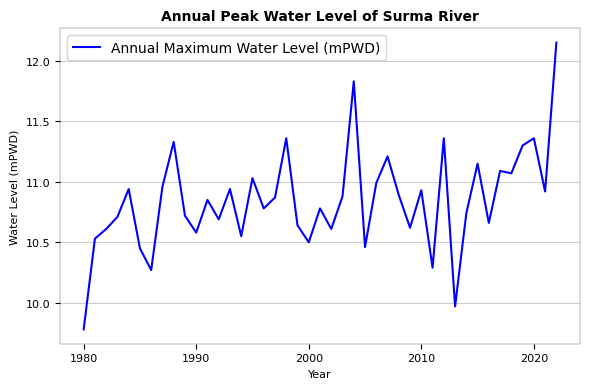

In [12]:
plt.rcParams["figure.figsize"] = [6,4]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,1, squeeze= True)

ax.plot(df1['Year'],df1['Corrected mPWD'], color='blue', label= 'Annual Maximum Water Level (mPWD)')



# plt.yticks(np.arange(50,300,25))
plt.title("Annual Peak Water Level of Surma River", fontsize=10, fontweight = 'semibold')
plt.xlabel('Year', fontsize=8)
plt.ylabel('Water Level (mPWD)', fontsize=8)
# plt.yticks(list(np.arange(100, 450, 50)), alpha=1)
# plt.xticks(list(np.arange(0, 4, .25)), alpha=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc=(0.1,0.65))
plt.legend()
plt.tight_layout()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0.2)
plt.savefig("Annual Peak Water Level of Surma River 1980-2022.png", dpi=500)

In [13]:
df1['Danger Level']=np.empty
for i in range(0,55589):
  df1.loc[i,'Danger Level'] = 11.26
df1.head()

,Date,Corrected mPWD,Year,Danger Level
200,1980-07-19 12:00:00,9.78,1980.0,11.26
577,1981-07-31 12:00:00,10.53,1981.0,11.26
920,1982-07-09 12:00:00,10.61,1982.0,11.26
1333,1983-08-26 12:00:00,10.71,1983.0,11.26
1604,1984-05-23 12:00:00,10.94,1984.0,11.26


In [14]:
df1['Danger Level'] = pd.to_numeric(df1['Danger Level'], errors='coerce')

In [15]:
df1.to_excel("annual_peak_danger_level_WL_1980-2022.xlsx")


In [16]:
df2= pd.read_excel('annual_peak_danger_level_WL_1980-2022.xlsx',index_col=0,sheet_name=0)


# df2.head()
# df2.tail()

In [55]:
df3=df2.dropna()
df4 = df3.reset_index()
df5 = df4.drop('index', axis = 1)
df5.head()
df5.tail(10)

,Date,Corrected mPWD,Year,Danger Level
33,2013-08-18 15:00:00,9.97,2013.0,11.26
34,2014-08-26 09:00:00,10.74,2014.0,11.26
35,2015-09-01 18:00:00,11.15,2015.0,11.26
36,2016-07-26 06:00:00,10.66,2016.0,11.26
37,2017-08-15 12:00:00,11.09,2017.0,11.26
38,2018-06-18 00:00:00,11.07,2018.0,11.26
39,2019-07-15 18:00:00,11.30,2019.0,11.26
40,2020-07-12 15:00:00,11.36,2020.0,11.26
41,2021-08-15 18:00:00,10.92,2021.0,11.26
42,2022-06-18 18:00:00,12.15,2022.0,11.26


<ipython-input-60-fdff37270714>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


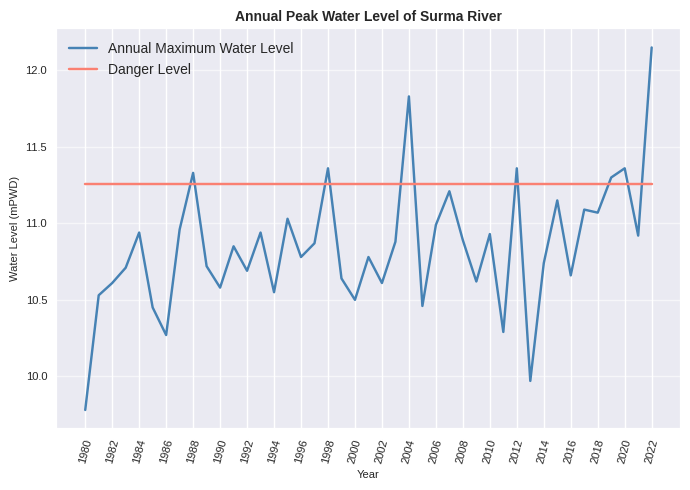

In [60]:
plt.style.use('seaborn')

plt.rcParams["figure.figsize"] = [7,5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,1, squeeze= True)

ax.plot(df5['Year'],df5['Corrected mPWD'], color='steelblue', label= 'Annual Maximum Water Level')
ax.plot(df5['Year'],df5['Danger Level'], color='salmon', label= 'Danger Level')


# plt.yticks(np.arange(50,300,25))
plt.title("Annual Peak Water Level of Surma River", fontsize=10, fontweight = 'semibold')
plt.xlabel('Year', fontsize=8)
plt.ylabel('Water Level (mPWD)', fontsize=8)
# plt.yticks(list(np.arange(100, 450, 50)), alpha=1)
plt.xticks(list(np.arange(1980, 2024, 2)), alpha=1)
plt.xticks(rotation = 75)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc=(0.1,0.65))
plt.legend()
plt.tight_layout()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0.2)
plt.savefig("Danger level Annual Peak Water Level of Surma River 1980-2022.png", dpi=500)

<ipython-input-61-a2df2a00ce26>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


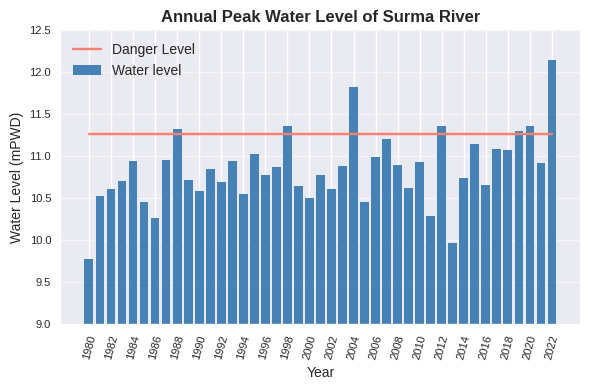

In [61]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(1,1,1)
ax1.bar(df4['Year'], df5['Corrected mPWD'], color='steelblue')
ax1.plot(df5['Year'],df5['Danger Level'], color='salmon', label= 'Danger Level (mPWD)')

plt.title("Annual Peak Water Level of Surma River", fontsize=12, fontweight = 'semibold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Water Level (mPWD)', fontsize=10)

label = ['Danger Level', 'Water level',]
# plt.yticks(list(np.arange(100, 450, 50)), alpha=1)
# plt.xlim(-10, 10)
plt.ylim(9, 12.5)
plt.xticks(list(np.arange(1980, 2024, 2)), alpha=1)
plt.xticks(rotation = 75)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
# handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles, labels,fontsize=8 )
# fig.legend(handles, labels, loc=(0.1,0.65))
plt.legend(label,loc=2)
# plt.legend()
plt.tight_layout()
for location in ['left', 'right', 'top', 'bottom']:
    ax1.spines[location].set_linewidth(0.2)
plt.savefig("Bar_line_Danger level Annual Peak Water Level of Surma River 1980-2022.png", dpi=600)